In [1]:
#FileName: KickScrape_KLarson10292020.ipynb
#Author: Kyle Larson
#Purpose: To analyze the file 
#DSI_kickstarterscrape_dataset.csv
import pandas as pd
import csv
kickscrape_path ="DSI_kickstarterscrape_dataset.csv"
#I had originally attempted to read using read_csv but ran into issues with encoding utf8 and CP1252
#---TO DO: Go back and try using something like the below 
#kickdataframe = pd.read_csv(kickscrape_path, sep=",", encoding="latin-1")
#-----
# NOTE: Parsing this file requires approximately 10 minutes
i=0
with open(kickscrape_path, encoding='latin-1', mode='r') as csv_file:#encoding="utf8"
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        if(i==0):
            cols = row
            df = pd.DataFrame(columns=[cols])
        else:
            df_length = len(df)
            df.loc[df_length] = row
        #if(i==500):
        #    break
        i=i+1
df.head()
          

,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,funded date,levels,reward levels,updates,comments,duration
0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500,11545,1.09952381,66,"Fri, 19 Aug 2011 19:28:17 -0000",7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30
1,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000,20,0.005,2,"Mon, 02 Aug 2010 03:59:00 -0000",5,"$1,$5,$10,$25,$50",6,0,47.18
2,138119,STRUM,http://www.kickstarter.com/projects/185476022/...,Film & Video,Animation,"Los Angeles, CA",live,20000,56,0.0028,3,"Fri, 08 Jun 2012 00:00:31 -0000",10,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001",1,0,28
3,237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",successful,6000,6535,1.089166667,100,"Sun, 08 Apr 2012 02:14:00 -0000",13,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...",4,0,32.22
4,246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,Fashion,"Novi, MI",failed,3500,0,0,0,"Wed, 01 Jun 2011 15:25:39 -0000",6,"$10,$25,$50,$100,$150,$250",2,0,30


In [90]:
#Note all data above are lists of strings so the usual niceness of dataframes will be less easy
#See TO DO above for tip to improve analyzability

In [23]:
df.describe()

,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,funded date,levels,reward levels,updates,comments,duration
count,45957,45957,45957,45957,45957,45957,45957,45957,45957,45957,45957,45957,45957,45957,45957,45957,45957
unique,45815,45754,45814,14,51,4850,5,1837,10951,21977,974,41068,64,28379,84,315,5954
top,2141525347,Black Storm,http://www.kickstarter.com/projects/13588168/p...,Film &amp; Video,Documentary,"Los Angeles, CA",successful,5000,0,0,0,"Sun, 01 Jan 2012 04:59:00 -0000",7,"$10,$25,$50,$100,$250,$500,$1,000",0,0,30
freq,2,3,2,13053,4012,3927,22969,4217,3944,3944,3945,44,5847,369,16040,23469,11113


In [25]:
# Note this would be much easier if read_csv was used
import re
X = df[['pledged']]
sigma =0
arbetrary = 20#an arbetrary small number compared to 45957 to account for gap in data
i=0
while(i< len(X)-arbetrary):
    if not re.search('\d+', X.iloc[i][0]):
        print(X.iloc[i][0])
    else:
        sigma = sigma + float(X.iloc[i][0])
    i=i+1
print(sigma)













228735822.0


In [128]:
# population mean
print(sigma/(len(X)-arbetrary))

4979.337396869626


In [26]:
Y = df[['backers']]
y = pd.DataFrame(columns=['backers'])
i=0
Y_length = len(Y) - 20
while i < Y_length:
    if not re.search('\d+', Y.iloc[i][0]):
        print(Y.iloc[i][0])
    else:
        df_length = len(y)
        y.loc[df_length] =  float(Y.iloc[i][0])
    i=i+1
y.head()

,backers
0,66.0
1,2.0
2,3.0
3,100.0
4,0.0


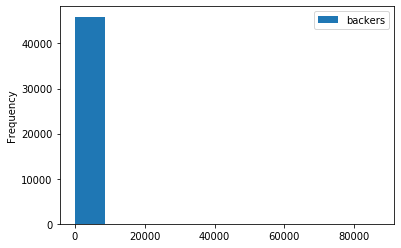

In [135]:
y.plot(kind='hist')

In [27]:
#the goal here is to see if duration is normally distributed
import re
Z = df[['duration']]
z = pd.DataFrame(columns=['duration'])
i=0
Z_length = len(Z) -20
while i < Z_length:
    if not re.search('\d+', Z.iloc[i][0]):
        print(Z.iloc[i][0])
    else:
        df_length = len(z)
        z.loc[df_length] =  float(Z.iloc[i][0])
    i=i+1
z.head()

,duration
0,30.00
1,47.18
2,28.00
3,32.22
4,30.00


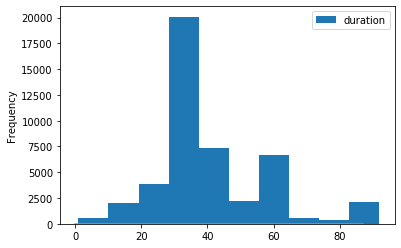

In [14]:
z.plot(kind='hist')
#We alrady know this will not be normal because 30 days and 60 days are recommendations by Kickstarter
#It is interresting to note that there is a significant spike at arround 90 days as well

In [3]:
S = df[['status']]

In [40]:
#best length of time
s = pd.DataFrame(columns=['duration'])
f = pd.DataFrame(columns=['duration'])
i = 0
S_length = len(S)
while i<S_length:
    if S.iloc[i][0] == 'successful':
        #df_length = len(s)
        #s.iloc[df_length] = float(Z.iloc[i][0])
        s = s.append({'duration':float(Z.iloc[i][0])}, ignore_index=True)
    if S.iloc[i][0] == 'failed':
        #df_length = len(f)
        #f.iloc[df_length] = float(Z.iloc[i][0])
        f = f.append({'duration':float(Z.iloc[i][0])}, ignore_index=True)
    i=i+1
print(s.head())
print(f.head())

   duration
0     30.00
1     32.22
2     21.43
3     30.00
4     67.53
   duration
0     47.18
1     30.00
2     30.00
3     40.04
4     60.34


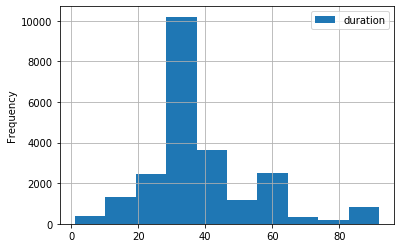

In [46]:
s.plot(kind='hist', grid = True)

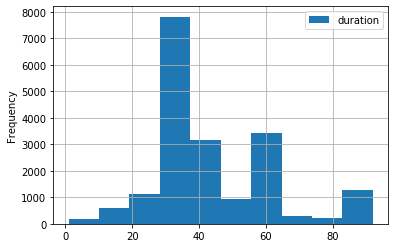

In [47]:
f.plot(kind='hist', grid = True)

In [67]:
#Pooled t-test for comparison of means
#It will be assumed that the distributions have been pulled from normally distributed populations
#This may not be an appropriate assumption due to the nearly identical spikes in samples at 30&60days
#suggesting bimodal distribution, but it is still worth doing because with smaller sample size this 
#the sample could have passed for normally distributed data
#It will be assumed that whether one project is a success is independent from whether the other is a success
#This may not be appropriate because investors sacrifice opportunity with each project they back 
#additionally the number of projects they view and whether their sampling is random also affect 
#whether their selection is independent, but for simplicity sake and to honor the sheer sample size
#we will perform a pooled two sample comparison of means
#to calculate variances S_X_success and S_X_failed
#S_X_s = 0
#NOTE: dtest = pd.DataFrame({'test':[1, 2, 3, 4, 5, 6]}, columns=['test'])
#print(dtest.sum()) #21
#i = 0
#X_s = s.mean()
#s_length = len(s)
#while(i<s_length):
#    S_X_s = S_X_s + (s.iloc[i][0] - X_s)**2
#    i=i+1
#S_X_s = S_X_s/(s_length-1)
#print(S_X_s)  #var is equivalent
#print(s.var())
S_p = ( ( (len(s)-1)*s.var()+ (len(f)-1)*f.var() )/(len(S)+len(f)-2) )**0.5#sqrt
print('calculating statistic factors...')
scaled_root_parallel = (S_p*(((1/len(s))+(1/len(f)))**0.5))
print('calculating statistic factors...')
t_stat = ( s.mean() - f.mean() )/scaled_root_parallel
print('Tstatistic:'+str(t_stat))
print('pooled degrees of freedom:'+str(len(s)+len(f)-2)) #df for pooled 
print('p-value < 0.000001. The test for rejection of Ho (equal means) is significant at alpha = 0.05')
print('mean of successful projects (days): '+str(s.mean()))
#conclusion there is a highly significant correlation between success and projects being shorter than the average success
#note: this correlation does not imply causation, however this is consistent with intuitive strategy
#of providing the right backers with an ideal time frame (near a months time)
#balances the psychology of time pressure to act and the psychology of allowing for exposure and weighing of options
#however further study should control for independence, normality and other factors like campaign complexity
#projects that later turned out to require more time also may have been less likely to succeed in the first place
#to determine the gradient (avg success probability gained by limiting duration per number of days limited)

calculating statistic factors...
calculating statistic factors...
Tstatistic:duration   -36.155673
dtype: float64
pooled degrees of freedom:41963
p-value < 0.000001. The test for rejection of Ho (equal means) is significant at alpha = 0.05
mean of successful projects (days): duration    37.960475
dtype: float64


In [5]:
#ideal pledge goal
P = df[['pledged']]
e = pd.DataFrame(columns=['pledged'])
d = pd.DataFrame(columns=['pledged'])
i = 0
S_length = len(S)
while i<S_length:
    if S.iloc[i][0] == 'successful':
        e = e.append({'pledged':float(P.iloc[i][0])}, ignore_index=True)
    if S.iloc[i][0] == 'failed':
        d = d.append({'pledged':float(P.iloc[i][0])}, ignore_index=True)
    i=i+1
print(e.head())
print(d.head())

   pledged
0  11545.0
1   6535.0
2   3582.0
3   2180.0
4   1125.0
   pledged
0     20.0
1      0.0
2    280.0
3     75.0
4    765.0


In [25]:
x_t=[]
for i in range(12500):
    if(i%500==0):
        x_t.append(i)
print(x_t)

[0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, 10000, 10500, 11000, 11500, 12000]


C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


(0, 12500)

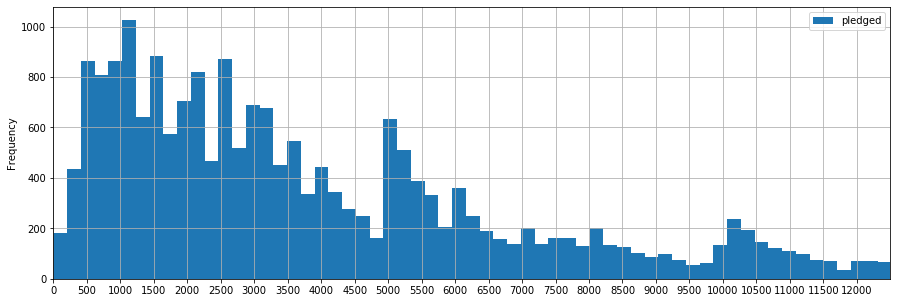

In [28]:
#ideal pledge goal
import matplotlib.pyplot as plt
e.plot(kind='hist',  bins=50000, xticks=x_t, grid = True, figsize=(15,5))
ax = plt.subplot(111)
ax.set_xlim(0, 12500)

In [35]:
x_tt=[]
for i in range(10000):
    if(i%500==0):
        x_tt.append(i)
print(x_tt)

[0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500]


C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


(0, 10000)

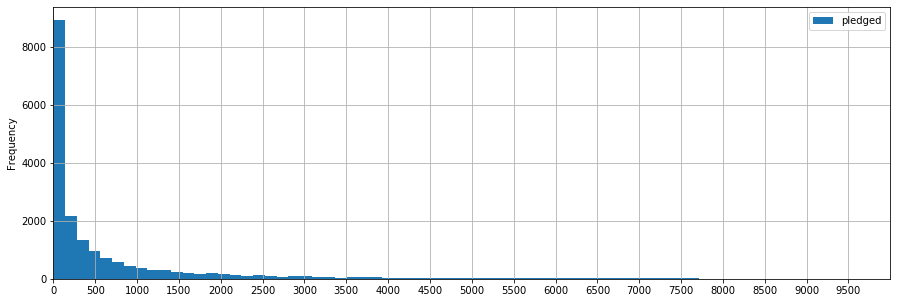

In [36]:
import matplotlib.pyplot as plt
d.plot(kind='hist', bins=800, xticks=x_tt, grid = True, figsize=(15,5))
ax = plt.subplot(111)
ax.set_xlim(0, 10000)

In [88]:
#Type of projects most successful
C = df[['category']]
c = pd.DataFrame(columns=['category'])
b = pd.DataFrame(columns=['category'])
i = 0
S_length = len(S)
while i<S_length:
    if S.iloc[i][0] == 'successful':
        c = c.append({'category':C.iloc[i][0]}, ignore_index=True)
    if S.iloc[i][0] == 'failed':
        b = b.append({'category':C.iloc[i][0]}, ignore_index=True)
    i=i+1
print(c.head())
print(b.head())

       category
0  Film & Video
1  Film & Video
2  Film & Video
3       Fashion
4         Music
       category
0         Games
1       Fashion
2  Film & Video
3         Dance
4    Publishing


In [70]:
#types of projects most successful
print(c.describe())

       category
count     17728
unique       14
top       Music
freq       5253


In [91]:
c100 = pd.DataFrame(columns=['category'])
for i in range(100):
   c100 = c100.append({'category':c.iloc[i][0]},ignore_index=True)

In [93]:
for i in range(100):
   print(c100.iloc[i][0])

Film & Video
Film & Video
Film & Video
Fashion
Music
Art
Technology
Music
Film & Video
Film & Video
Publishing
Music
Games
Film & Video
Publishing
Theater
Music
Music
Dance
Music
Music
Theater
Art
Film & Video
Film & Video
Film & Video
Games
Art
Art
Music
Music
Music
Film & Video
Music
Music
Games
Games
Art
Film & Video
Games
Film & Video
Film & Video
Theater
Art
Art
Film & Video
Technology
Music
Music
Dance
Film & Video
Film & Video
Games
Music
Theater
Film & Video
Theater
Music
Design
Music
Music
Photography
Music
Publishing
Music
Art
Film & Video
Music
Film & Video
Games
Art
Music
Photography
Music
Film & Video
Film & Video
Film & Video
Film & Video
Film & Video
Fashion
Music
Music
Music
Music
Music
Theater
Theater
Music
Film & Video
Art
Comics
Art
Art
Comics
Games
Music
Film & Video
Publishing
Art
Publishing


In [96]:
c100=c100.sort_values(['category'])
    #'Film & Video','Fashion', 'Music', 'Art', 'Technology', 'Publishing', 'Theater', 'Games', 'Comics', 'Design', 'Dance'])
for i in range(100):# 
   print(c100.iloc[i][0])

Art
Art
Art
Art
Art
Art
Art
Art
Art
Art
Art
Art
Art
Comics
Comics
Dance
Dance
Design
Fashion
Fashion
Film & Video
Film & Video
Film & Video
Film & Video
Film & Video
Film & Video
Film & Video
Film & Video
Film & Video
Film & Video
Film & Video
Film & Video
Film & Video
Film & Video
Film & Video
Film & Video
Film & Video
Film & Video
Film & Video
Film & Video
Film & Video
Film & Video
Film & Video
Film & Video
Film & Video
Film & Video
Games
Games
Games
Games
Games
Games
Games
Games
Music
Music
Music
Music
Music
Music
Music
Music
Music
Music
Music
Music
Music
Music
Music
Music
Music
Music
Music
Music
Music
Music
Music
Music
Music
Music
Music
Music
Music
Music
Photography
Photography
Publishing
Publishing
Publishing
Publishing
Publishing
Technology
Technology
Theater
Theater
Theater
Theater
Theater
Theater
Theater


In [97]:
c=c.sort_values(['category'])
c_length=len(c)-1
for i in range(c_length):
    if c.iloc[i][0] == 'Music':
        c=c.drop(c.index[i])

IndexError: single positional indexer is out-of-bounds

In [101]:
c100

,category
37,Art
43,Art
44,Art
92,Art
5,Art
...,...
21,Theater
42,Theater
15,Theater
86,Theater


In [107]:
print(c100.query(expr='Art'))

UndefinedVariableError: name 'Art' is not defined

In [98]:
c.describe()

,category
count,19573
unique,14
top,Film &amp; Video
freq,6177


In [99]:
c_length=len(c)-1
for i in range(c_length):
    if c.iloc[i][0] == 'Film &amp; Video':
        c=c.drop(c.index[i])

IndexError: single positional indexer is out-of-bounds

In [100]:
c.describe()

,category
count,16484
unique,14
top,Music
freq,3396


In [86]:
c_length=len(c)-1
for i in range(c_length):
    if c.iloc[i][0] == 'Art':
        c=c.drop(c.index[i])

IndexError: single positional indexer is out-of-bounds

In [87]:
c.describe()

,category
count,10072
unique,14
top,Film &amp; Video
freq,1727


In [80]:
b.describe()

,category
count,18996
unique,14
top,Film &amp; Video
freq,5962


In [82]:
b_length= len(b)
for i in range(b_length):
    if b.iloc[i][0] == 'Film &amp; Video':
        b=b.drop(b.index[i])

IndexError: single positional indexer is out-of-bounds

In [83]:
b.describe()

,category
count,14488
unique,14
top,Music
freq,3261


In [84]:
b_length=len(b)-1
for i in range(b_length):
    if b.iloc[i][0] == 'Music':
        b=b.drop(b.index[i])

IndexError: single positional indexer is out-of-bounds

In [85]:
b.describe()

,category
count,11833
unique,14
top,Publishing
freq,2484


In [ ]:
#ideal launch timing